In [1]:
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
df_train=pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [4]:
X_train = df_train.iloc[:, :-1]
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [5]:
y_train = df_train.iloc[:, 8]
y_train

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [6]:
x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, 8]

In [7]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(1)
])

In [8]:
model.compile(optimizer="adam",loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=100)
model.summary()

Epoch 1/100
532/532 [==============================] - 7s 4ms/step - loss: 54832283648.0000
Epoch 2/100
532/532 [==============================] - 2s 4ms/step - loss: 53697007616.0000
Epoch 3/100
532/532 [==============================] - 2s 4ms/step - loss: 52599324672.0000
Epoch 4/100
532/532 [==============================] - 2s 4ms/step - loss: 51531280384.0000
Epoch 5/100
532/532 [==============================] - 2s 4ms/step - loss: 50491105280.0000
Epoch 6/100
532/532 [==============================] - 2s 4ms/step - loss: 49477255168.0000
Epoch 7/100
532/532 [==============================] - 2s 4ms/step - loss: 48489082880.0000
Epoch 8/100
532/532 [==============================] - 2s 3ms/step - loss: 47526621184.0000
Epoch 9/100
532/532 [==============================] - 2s 4ms/step - loss: 46588465152.0000
Epoch 10/100
532/532 [==============================] - 2s 3ms/step - loss: 45673385984.0000
Epoch 11/100
532/532 [==============================] - 1s 2ms/step - loss: 447

MAE: 114203.4705485026
MSE: 24480378969.6025
RMSE: 156462.0687885805
VarScore: -0.512852776596092


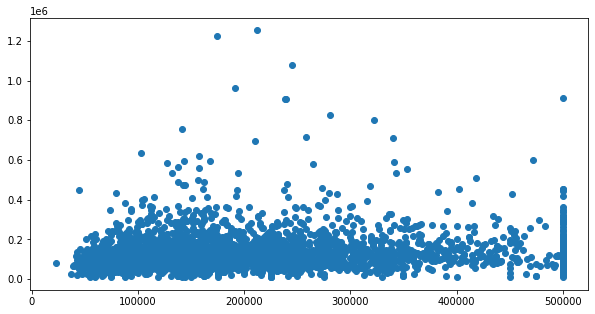

In [9]:
y_pred = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

In [10]:
print('Predict: ',y_pred[0], y_pred[1], y_pred[2])
print('Actual: ',y_test[0],y_test[1],y_test[2])

Predict:  [177620.22] [82257.07] [161443.19]
Actual:  344700.0 176500.0 270500.0


In [11]:
score=metrics.r2_score(y_test,y_pred)
score

-0.9137558552346108

In [12]:
model2 = tf.keras.models.Sequential([
tf.keras.layers.Dense(8,activation='relu'),         
tf.keras.layers.Dense(8,activation='relu'),   
tf.keras.layers.Dense(8,activation='relu'),   
tf.keras.layers.Dense(8,activation='relu'),   
tf.keras.layers.Dense(8,activation='relu'),   
tf.keras.layers.Dense(1)
])

In [18]:
model2.compile(optimizer="adam",loss='mean_squared_error')
history=model2.fit(X_train,y_train,epochs=100)
model2.summary()

Epoch 1/100
532/532 [==============================] - 2s 3ms/step - loss: 38880559104.0000
Epoch 2/100
532/532 [==============================] - 1s 3ms/step - loss: 26343530496.0000
Epoch 3/100
532/532 [==============================] - 1s 3ms/step - loss: 24005709824.0000
Epoch 4/100
532/532 [==============================] - 1s 3ms/step - loss: 16314890240.0000
Epoch 5/100
532/532 [==============================] - 1s 3ms/step - loss: 11678153728.0000
Epoch 6/100
532/532 [==============================] - 1s 3ms/step - loss: 11210195968.0000
Epoch 7/100
532/532 [==============================] - 1s 3ms/step - loss: 10797616128.0000
Epoch 8/100
532/532 [==============================] - 1s 3ms/step - loss: 10455296000.0000
Epoch 9/100
532/532 [==============================] - 1s 3ms/step - loss: 10168805376.0000
Epoch 10/100
532/532 [==============================] - 1s 3ms/step - loss: 9897616384.0000
Epoch 11/100
532/532 [==============================] - 1s 3ms/step - loss: 9629

MAE: 53759.32315364583
MSE: 5312853084.888055
RMSE: 72889.32078767133
VarScore: 0.5879016352385569


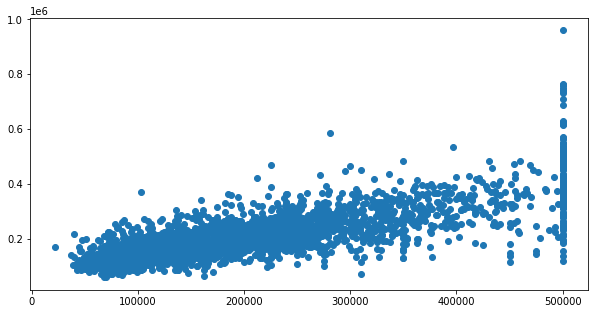

In [19]:
y_pred = model2.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

In [21]:
print('Predict: ',y_pred[0:5])
print('Actual: ',y_test[0:5])

Predict:  [[344072.03]
 [218722.31]
 [294100.9 ]
 [244359.28]
 [133099.55]]
Actual:  0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64


In [22]:
model3 = tf.keras.models.Sequential([
tf.keras.layers.Dense(64,activation='relu'),         
tf.keras.layers.Dense(128,activation='relu'),   
tf.keras.layers.Dense(256,activation='relu'),   
tf.keras.layers.Dense(128,activation='relu'),   
tf.keras.layers.Dense(64,activation='relu'),   
tf.keras.layers.Dense(1)
])

In [23]:
model3.compile(optimizer="adam",loss='mean_squared_error')
history=model3.fit(X_train,y_train,epochs=100)
model3.summary()

Epoch 1/100
532/532 [==============================] - 2s 3ms/step - loss: 22180757504.0000
Epoch 2/100
532/532 [==============================] - 1s 3ms/step - loss: 10582593536.0000
Epoch 3/100
532/532 [==============================] - 1s 3ms/step - loss: 9379233792.0000
Epoch 4/100
532/532 [==============================] - 1s 3ms/step - loss: 8335004672.0000
Epoch 5/100
532/532 [==============================] - 1s 3ms/step - loss: 7913517056.0000
Epoch 6/100
532/532 [==============================] - 1s 3ms/step - loss: 7565373952.0000
Epoch 7/100
532/532 [==============================] - 1s 3ms/step - loss: 7177433600.0000
Epoch 8/100
532/532 [==============================] - 1s 3ms/step - loss: 6979299328.0000
Epoch 9/100
532/532 [==============================] - 1s 3ms/step - loss: 6664470528.0000
Epoch 10/100
532/532 [==============================] - 1s 3ms/step - loss: 6557880832.0000
Epoch 11/100
532/532 [==============================] - 1s 3ms/step - loss: 6236689920.

MAE: 49502.013709635416
MSE: 5027822087.037699
RMSE: 70907.13706699558
VarScore: 0.6564951570899101


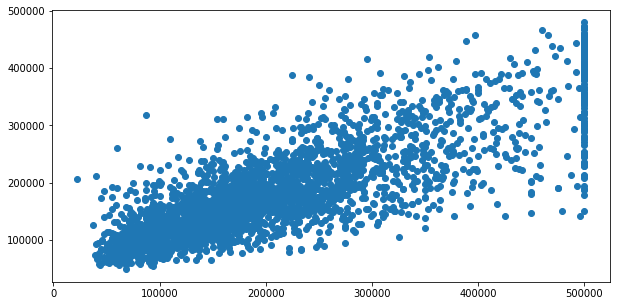

In [24]:
y_pred = model3.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

In [25]:
print('Predict: ',y_pred[0:5])
print('Actual: ',y_test[0:5])

Predict:  [[334309.8 ]
 [181957.52]
 [268069.8 ]
 [218604.42]
 [ 92266.76]]
Actual:  0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64


In [32]:
model4 = tf.keras.models.Sequential([
tf.keras.layers.Dense(8,activation='relu'),         
tf.keras.layers.Dense(64,activation='relu'),   
tf.keras.layers.Dense(128,activation='relu'),   
tf.keras.layers.Dense(256,activation='relu'),   
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1024,activation='relu'),  
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(64,activation='relu'), 
tf.keras.layers.Dense(1)
])

In [36]:
model4.compile(optimizer="adam",loss='mean_squared_error')
history=model4.fit(X_train,y_train,epochs=500)
model4.summary()

Epoch 1/500
532/532 [==============================] - 3s 4ms/step - loss: 4389770752.0000
Epoch 2/500
532/532 [==============================] - 2s 4ms/step - loss: 4467561472.0000
Epoch 3/500
532/532 [==============================] - 2s 4ms/step - loss: 4247500032.0000
Epoch 4/500
532/532 [==============================] - 2s 3ms/step - loss: 4234288640.0000
Epoch 5/500
532/532 [==============================] - 2s 3ms/step - loss: 4357078528.0000
Epoch 6/500
532/532 [==============================] - 2s 3ms/step - loss: 4477848576.0000
Epoch 7/500
532/532 [==============================] - 2s 4ms/step - loss: 4339002880.0000
Epoch 8/500
532/532 [==============================] - 2s 4ms/step - loss: 4322425344.0000
Epoch 9/500
532/532 [==============================] - 2s 4ms/step - loss: 4356965888.0000
Epoch 10/500
532/532 [==============================] - 2s 4ms/step - loss: 4356493824.0000
Epoch 11/500
532/532 [==============================] - 2s 4ms/step - loss: 4339545088.00

MAE: 51568.24685026042
MSE: 5386700576.597203
RMSE: 73394.14538365579
VarScore: 0.6242268401031725


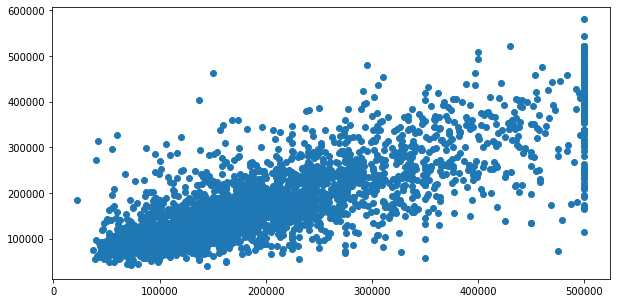

In [37]:
y_pred = model4.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

In [38]:
print('Predict: ',y_pred[0:5])
print('Actual: ',y_test[0:5])

Predict:  [[373206.94]
 [155127.19]
 [252832.47]
 [169945.36]
 [ 71344.21]]
Actual:  0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64
